In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Input,Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.utils import np_utils
from pathlib import Path
import tensorflow

In [3]:
path="/kaggle/input/fashionmnist/"
x=pd.read_csv(path+"fashion-mnist_train.csv")
x=np.array(x)
Xtrain=x[:,1:]
Xtrain=Xtrain/255
Ytrain=x[:,0]

In [4]:
np.unique(Ytrain,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [5]:
print(Xtrain.shape,Ytrain.shape)
print(Ytrain)

(60000, 784) (60000,)
[2 9 6 ... 8 8 7]


In [6]:
Xtrain=Xtrain.reshape((60000,28,28,1))
Ytrain=np_utils.to_categorical(Ytrain)

In [7]:
print(Xtrain.shape,Ytrain.shape)

(60000, 28, 28, 1) (60000, 10)


In [8]:
import matplotlib.pyplot as plt

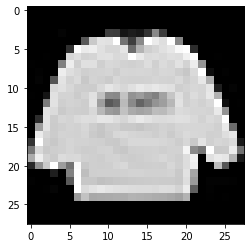

In [9]:
plt.imshow(Xtrain[0],cmap="gray")
plt.show()

In [10]:
##CNN model
Model=Sequential()
Model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
Model.add(Convolution2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
Model.add(Dropout(0.25))
Model.add(MaxPooling2D(2,2))
Model.add(Convolution2D(32,(3,3),activation='relu'))
Model.add(Convolution2D(8,(3,3),activation='relu'))
Model.add(Flatten())
Model.add(Dense(10,activation='softmax'))
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           2312      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

2022-04-12 04:16:07.123154: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
Model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [12]:
hist=Model.fit(Xtrain,Ytrain,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

2022-04-12 04:16:07.639006: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
188/188 [==============================] - 52s 271ms/step - loss: 0.7528 - accuracy: 0.7297 - val_loss: 0.4946 - val_accuracy: 0.8300
Epoch 2/20
188/188 [==============================] - 51s 269ms/step - loss: 0.4220 - accuracy: 0.8490 - val_loss: 0.4000 - val_accuracy: 0.8649
Epoch 3/20
188/188 [==============================] - 51s 271ms/step - loss: 0.3621 - accuracy: 0.8706 - val_loss: 0.3628 - val_accuracy: 0.8769
Epoch 4/20
188/188 [==============================] - 50s 264ms/step - loss: 0.3299 - accuracy: 0.8829 - val_loss: 0.3431 - val_accuracy: 0.8860
Epoch 5/20
188/188 [==============================] - 51s 270ms/step - loss: 0.3100 - accuracy: 0.8898 - val_loss: 0.3244 - val_accuracy: 0.8884
Epoch 6/20
188/188 [==============================] - 50s 267ms/step - loss: 0.2913 - accuracy: 0.8946 - val_loss: 0.3170 - val_accuracy: 0.8936
Epoch 7/20
188/188 [==============================] - 51s 271ms/step - loss: 0.2809 - accuracy: 0.8988 - val_loss: 0.2996 - val_ac

In [13]:
print(hist)

In [14]:
path="/kaggle/input/fashionmnist/"
x=pd.read_csv(path+"fashion-mnist_test.csv")
x=np.array(x)
Xtest=x[:,1:]
Xtest=Xtrain/255
Ytest=x[:,0]

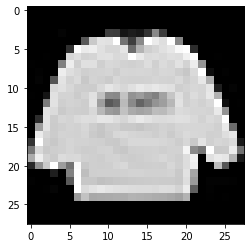

In [15]:
Xtest=Xtest.reshape((60000,28,28,1))
plt.imshow(Xtest[0],cmap="gray")
plt.show()

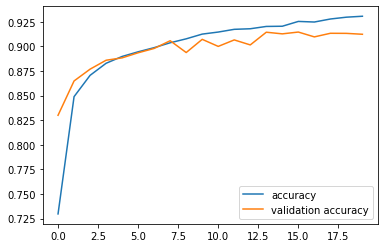

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','validation accuracy'])